In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

For Training Data:

In [2]:
data=pd.read_csv('/content/sample_data/california_housing_train.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [5]:
data['total_bedrooms'].isnull() 

0        False
1        False
2        False
3        False
4        False
         ...  
16995    False
16996    False
16997    False
16998    False
16999    False
Name: total_bedrooms, Length: 17000, dtype: bool

for Test Data:

In [6]:
data_test=pd.read_csv('/content/sample_data/california_housing_test.csv')

for Normalization of data:

In [7]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

In [8]:
#data = scaler.fit_transform(data)

In [9]:
#data_test = scaler.fit_transform(data_test)

In [10]:
#data=pd.DataFrame(data)

In [11]:
#data_test=pd.DataFrame(data_test)

In [12]:
X = data.iloc[:, :-1]
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


In [13]:
y = data.iloc[:, 8]
y

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

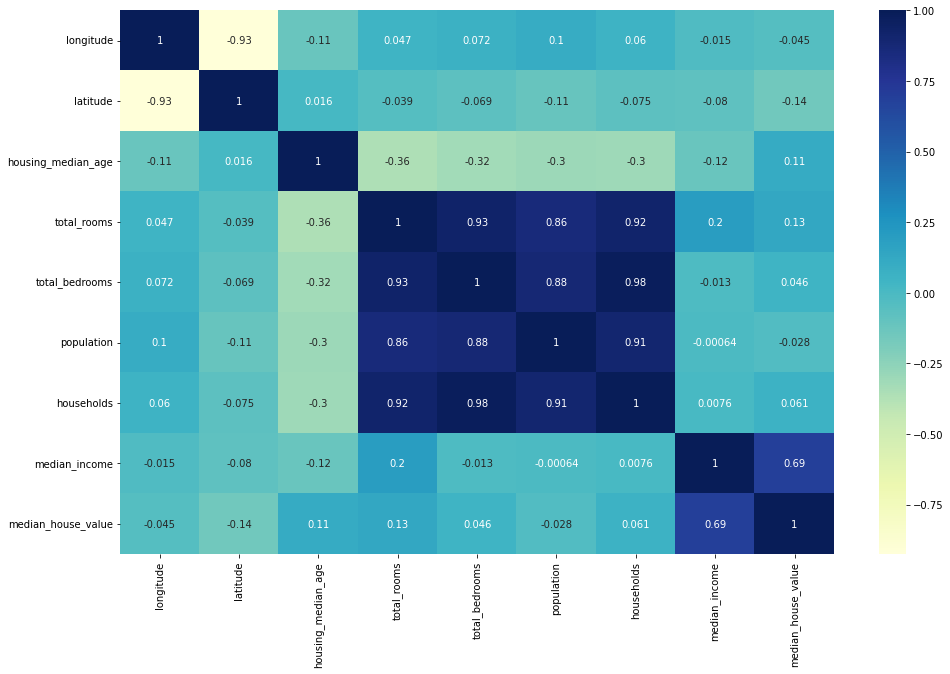

In [14]:
plt.figure(figsize = (16, 10))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

Linear Regression:

In [15]:
model=LinearRegression()

In [16]:
model.fit(X,y)

LinearRegression()

In [17]:
x_test = data_test.iloc[:, :-1]
y_test = data_test.iloc[:, 8]

In [18]:
y_pred = model.predict(x_test)

In [19]:
from sklearn import metrics

In [20]:
score=metrics.r2_score(y_test,y_pred)
score

0.6195057678312047

In [21]:
model.score(X,y)

0.6413378529502687

In [22]:
print('predict:',y_pred[0])
print('actual:',y_test[0])

predict: 352812.3111245362
actual: 344700.0


In [23]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 50352.22825794297
MSE: 4867205486.928806
RMSE: 69765.36022216761


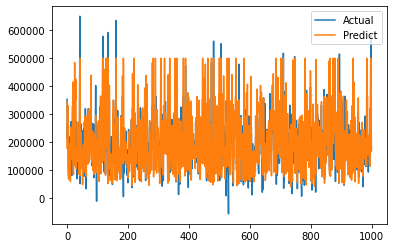

In [24]:
gr=pd.DataFrame({'Predict':y_pred,'Actual': y_test})
#gr=gr.reset_index()
#gr=gr.drop(['index'],axis=1)
plt.plot(gr[:1000])
plt.legend(['Actual','Predict'])
#gr.plot.bar()

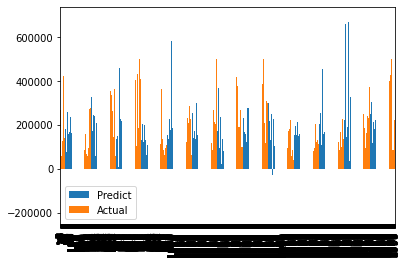

In [25]:
gr.plot.bar()